In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans



pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)

In [2]:
# Merging the given datasets

a = pd.read_csv('/Users/anushakaran/Documents/Capstone/lifeio_all_users_email_activity.csv')
b = pd.read_csv('/Users/anushakaran/Documents/Capstone/client_provided_third_party_data.csv')
merged = a.merge(b, how='right',on='client_id')
c = pd.read_csv('/Users/anushakaran/Documents/Capstone/lifeio_registered_users.csv')
merged1 = c.merge(merged,how='right', on='client_id')
d = pd.read_csv('/Users/anushakaran/Documents/Capstone/lifeio_registered_users_drawings_activity.csv')
merged2 = d.merge(merged1,how='right', on='client_id')
e = pd.read_csv('/Users/anushakaran/Documents/Capstone/client_policyholder_activity_beyond_lifeio.csv')
merged3 = e.merge(merged2,how='right', on='client_id')
f = pd.read_csv('/Users/anushakaran/Documents/Capstone/lifeio_registered_users_class_activity.csv')
merged4 = f.merge(merged3, how='right',on='client_id')
g = pd.read_csv('/Users/anushakaran/Documents/Capstone/lifeio_registered_users_profile_items.csv')
merged5 = g.merge(merged4,how='right', on='client_id')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Summary of the Merged Dataframe

merged5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32321691 entries, 0 to 32321690
Data columns (total 42 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   client_id                      int64  
 1   profile_item_name              object 
 2   profile_item_value             object 
 3   date_created_x                 object 
 4   class_name                     object 
 5   class_category                 object 
 6   status                         object 
 7   class_title                    object 
 8   date_created_y                 object 
 9   POLICY_ID                      object 
 10  LINE_OF_BUSINESS               object 
 11  FACE_AMT                       float64
 12  PROD_PREM_CR                   float64
 13  POL_DATE                       object 
 14  MD_LAPSE_DATE                  object 
 15  ZIP_CODE                       float64
 16  INFORCE_STATUS                 object 
 17  lottery_type                   object 
 18  

In [5]:
# Creating Boolean Fields to see if the user is Registered  , if the email is Opened and if the user had won the lottery and registered in the platform

merged5['registered'] = np.where(merged5['delivered_date']== merged5['registration_date'], 1,0)
merged5['Opened'] = np.where(merged5['delivered_date']== merged5['open_date'], 1,0)
merged5['lottery win and registered?']= np.where(merged5['drawings_win_date'].notna() & merged5['registered']==True , 1,0 )

In [6]:
# Dropping fields not required for analysis

to_drop = ['profile_item_value','date_created_x','date_created_y','status','POLICY_ID','LINE_OF_BUSINESS','FACE_AMT','PROD_PREM_CR','POL_DATE','MD_LAPSE_DATE','INFORCE_STATUS','lottery_type','drawings_enter_date','drawings_win_date','registration_date','delivered_date','click_date','open_date']
merged5 = merged5.drop(to_drop,axis=1)

In [7]:
# Filling the N/A zipcode values with 0

merged5['ZIP_CODE'] = merged5['ZIP_CODE'].fillna(0).astype(int)

In [9]:
# Extracting State from Zip Code using packages

from uszipcode import SearchEngine
from functools import lru_cache

search = SearchEngine(simple_zipcode=True)

@lru_cache()
def get_state(zipcode):
    return search.by_zipcode(zipcode).state

merged5['State'] = pd.Series(merged5['ZIP_CODE']).apply(get_state)

In [10]:
# Converting categorical variables to numberic values

merged5['gender'] = np.select([merged5.gender == 'F', merged5.gender == 'M' , merged5.gender == 'N' , merged5.gender == 'O'], [1, 2, 3, 4])
merged5['homeowner_renter_status'] = np.where(merged5['homeowner_renter_status'] == 'O',1,2)
merged5['line_of_business'] = np.select([merged5.line_of_business == 'TERM', merged5.line_of_business == 'LIFE' , merged5.line_of_business == 'UL' , merged5.line_of_business == 'A/S' , merged5.line_of_business == 'ANN'], [1, 2, 3, 4 , 5])
merged5['marital_status'] = np.select([merged5.marital_status == 'M', merged5.marital_status == 'S' , merged5.marital_status == 'A' , merged5.marital_status == 'B'], [1, 2, 3, 4])
merged5['orphan_status'] = np.where(merged5['orphan_status'] == 'NON-ORPHAN',1,2)
merged5['overall_soc_econ_status'] = np.select([merged5.overall_soc_econ_status == 'A', merged5.overall_soc_econ_status == 'B' , merged5.overall_soc_econ_status == 'C' , merged5.overall_soc_econ_status == 'D' , merged5.overall_soc_econ_status == 'E'], [1, 2, 3, 4, 5])

In [11]:
# Converting categorical variables to numberic values

merged5['home_market_value'] = np.select([
merged5.home_market_value == 'A', 
merged5.home_market_value == 'B', 
merged5.home_market_value == 'C', 
merged5.home_market_value==  'D', 
merged5.home_market_value == 'E',
merged5.home_market_value == 'F',
merged5.home_market_value == 'G',
merged5.home_market_value == 'H',
merged5.home_market_value == 'I',
merged5.home_market_value == 'J',
merged5.home_market_value == 'K',
merged5.home_market_value == 'L',
merged5.home_market_value == 'M',
merged5.home_market_value == 'N',
merged5.home_market_value == 'O',
merged5.home_market_value == 'P',
merged5.home_market_value == 'Q',
merged5.home_market_value == 'R',
merged5.home_market_value == 'S']
, [1, 2, 3, 4, 5 , 6 , 7 , 8 , 9 ,10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 ,19])



In [12]:
# Converting categorical variables to numberic values

merged5['State'] = np.select([
merged5.State == None,
merged5.State == 'TX', 
merged5.State == 'CA', 
merged5.State == 'IL', 
merged5.State == 'OH', 
merged5.State == 'MO',
merged5.State == 'KY',
merged5.State == 'MI',
merged5.State == 'PA',
merged5.State == 'NC',
merged5.State == 'MD',
merged5.State == 'SC',
merged5.State == 'IN',
merged5.State == 'FL',
merged5.State == 'LA',
merged5.State == 'AZ',
merged5.State == 'TN',
merged5.State == 'DC',
merged5.State == 'WV',
merged5.State == 'KS',
merged5.State == 'WI',
merged5.State == 'GA',
merged5.State == 'NM',
merged5.State == 'NJ',
merged5.State == 'NV',
merged5.State == 'VA',
merged5.State == 'MA',
merged5.State == 'DE',
merged5.State == 'AR',
merged5.State == 'NH',
merged5.State == 'AL',
merged5.State == 'WA',
merged5.State == 'MN',
merged5.State == 'NY',
merged5.State == 'CO',
merged5.State == 'HI',
merged5.State == 'OR',
merged5.State == 'IA',
merged5.State == 'MS',
merged5.State == 'CT',
merged5.State == 'MT',
merged5.State == 'ID',
merged5.State == 'UT',
merged5.State == 'OK',
merged5.State == 'SD',
merged5.State == 'ME',
merged5.State == 'AK',
merged5.State == 'ND',
merged5.State == 'NE',
merged5.State == 'RI',
merged5.State == 'WY',
merged5.State == 'PR',
merged5.State == 'VT']
,[0,1,2,5,4,5,6,7,8,9,10,11,12,15,14,15,16,17,18,19,20,21,22,25,24,25,26,27,28,29,50,51,52,55,54,55,56,57,58,59,40,41,42,45,44,45,46,47,48,49,50,51,52])

In [13]:
# Format N/A values with 0

merged5.fillna(0, inplace=True)

In [14]:
# Returns the first 5 rows

merged5.head(n=5)

,client_id,profile_item_name,class_name,class_category,class_title,ZIP_CODE,email_subject_line,age,economic_stability,gender,homeowner_renter_status,home_market_value,income_code,length_of_residence,line_of_business,marital_status,net_worth_indicator,number_of_adults,number_of_children,orphan_status,overall_educ_attain_index,overall_soc_econ_status,overall_soc_econ_status_index,overall_tech_adoption_index,registered,Opened,lottery win and registered?,State
0,1999120101353661,Affording Essential Expenses,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"Avoiding exercise, {{ contact.firstname }}? Ge...",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,0,1,0,0
1,1999120101353661,Rainy Day Expense,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"Avoiding exercise, {{ contact.firstname }}? Ge...",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,0,1,0,0
2,1999120101353661,Budgeting Habits,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"Avoiding exercise, {{ contact.firstname }}? Ge...",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,0,1,0,0
3,1999120101353661,Net Worth Calculation Habits,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"Avoiding exercise, {{ contact.firstname }}? Ge...",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,0,1,0,0
4,1999120101353661,Emergency Fund Savings,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"Avoiding exercise, {{ contact.firstname }}? Ge...",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,0,1,0,0


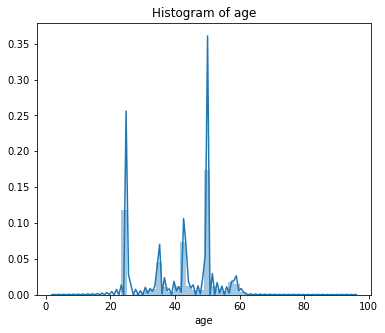

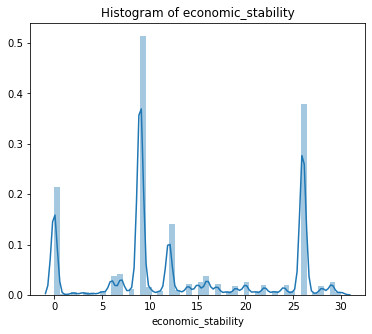

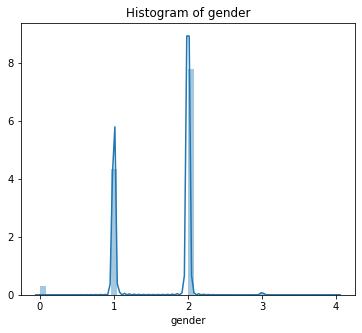

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


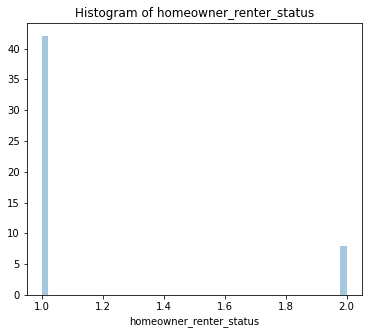

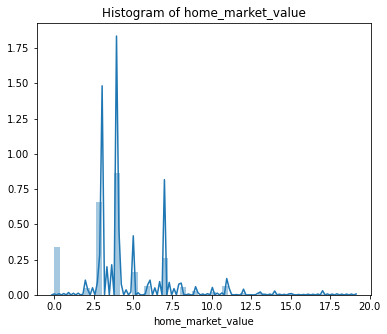

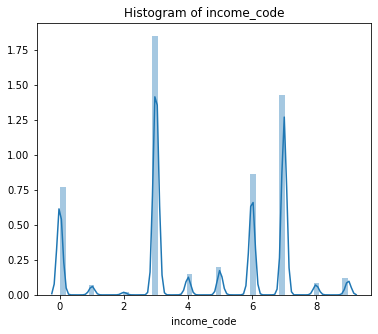

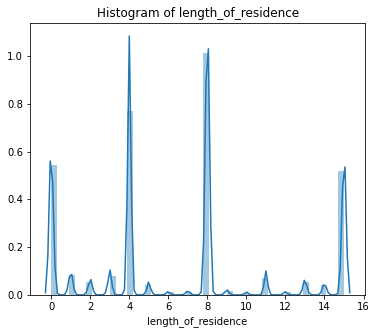

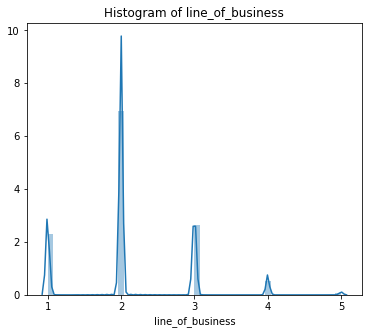

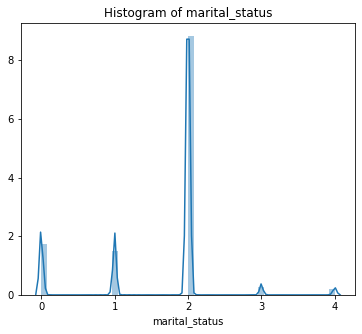

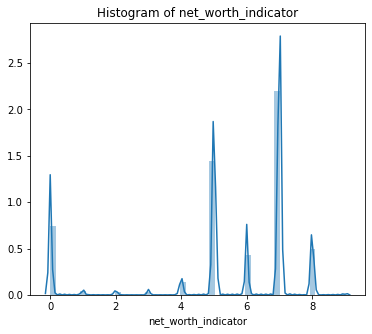

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


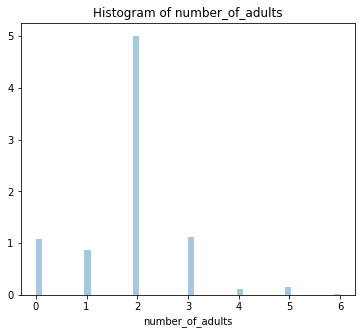

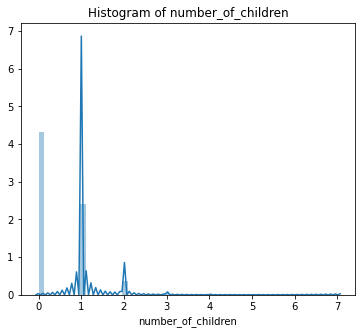

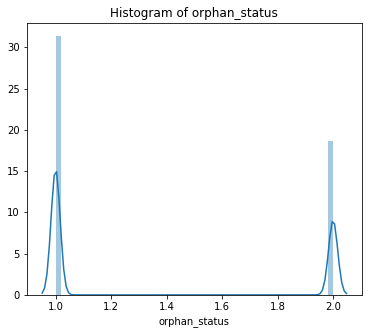

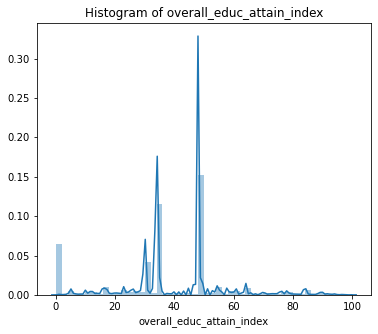

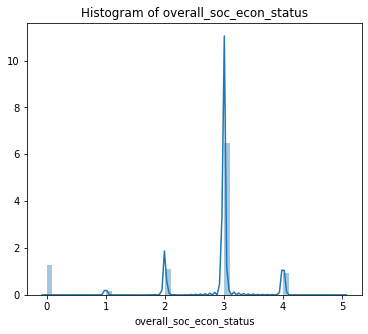

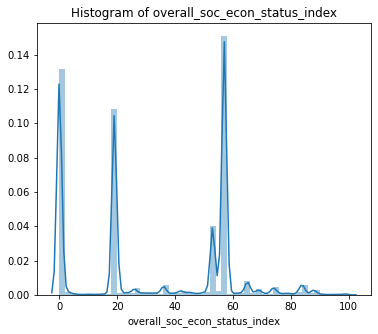

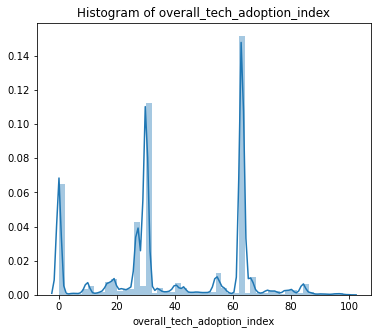

In [15]:
# Print Histogram of all the features

import seaborn as sns

for a in ['age','economic_stability','gender','homeowner_renter_status','home_market_value','income_code','length_of_residence','line_of_business','marital_status','net_worth_indicator','number_of_adults','number_of_children','orphan_status','overall_educ_attain_index','overall_soc_econ_status','overall_soc_econ_status_index','overall_tech_adoption_index']:
    ax=plt.subplots(figsize=(6,5))
    ax=sns.distplot(merged5[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

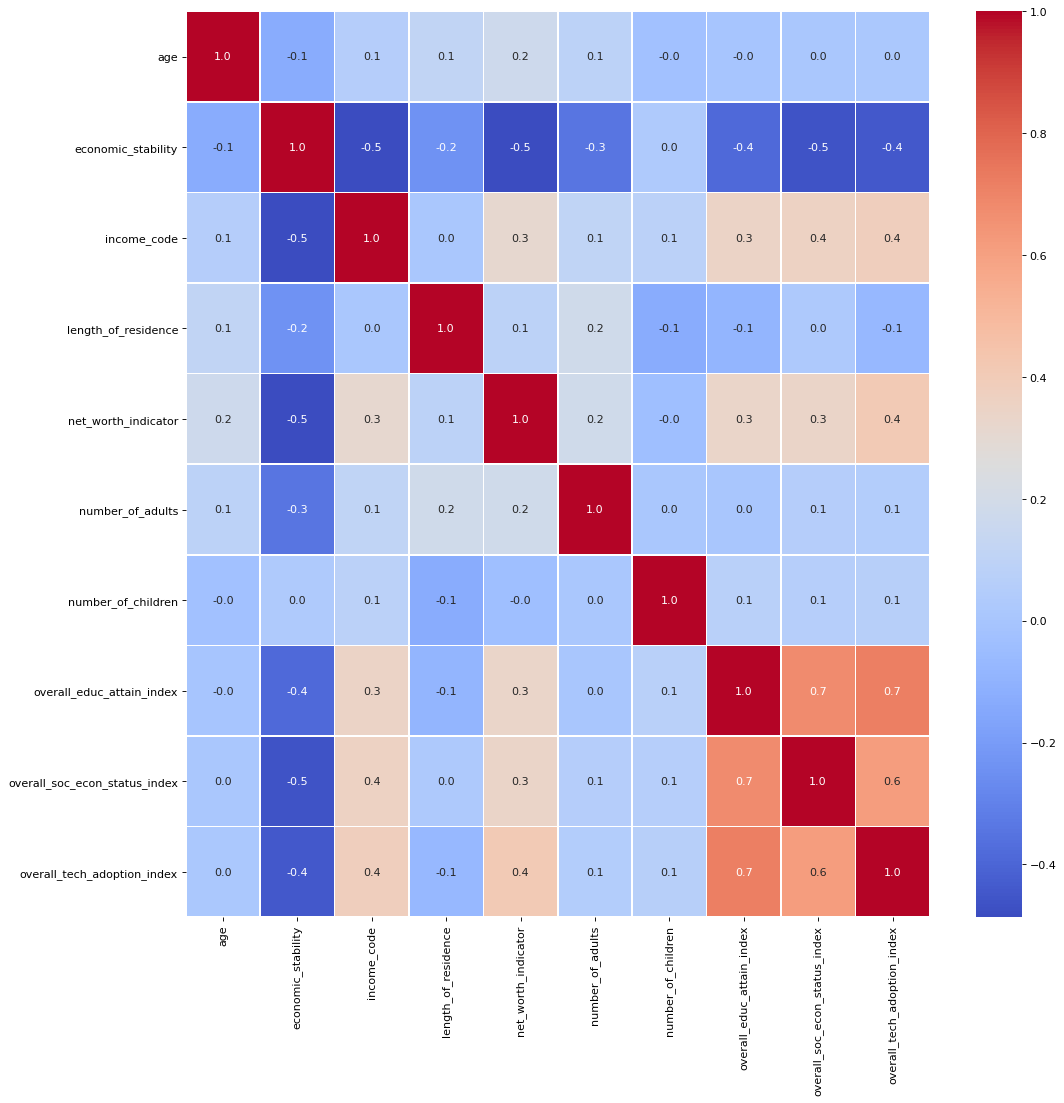

In [16]:
# Plot the correlation matrix for feature engineering

from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')


Check = pd.DataFrame(merged3,columns=['age','economic_stability','gender','home_market_value','income_code','length_of_residence','marital_status','net_worth_indicator','number_of_adults','number_of_children','overall_educ_attain_index','overall_soc_econ_status','overall_soc_econ_status_index','overall_tech_adoption_index'])
corrMatrix = Check.corr()
corrMatrix
sns.heatmap(corrMatrix, annot=True, linewidths=0.5 , fmt=".1f" , cmap='coolwarm')
plt.show()

In [36]:
# Storing features that are required for analysis on the final dataset

x = merged5.iloc[:, [7,8,9,11,12,15,20,23]].values
print(x.shape)

(32321691, 8)


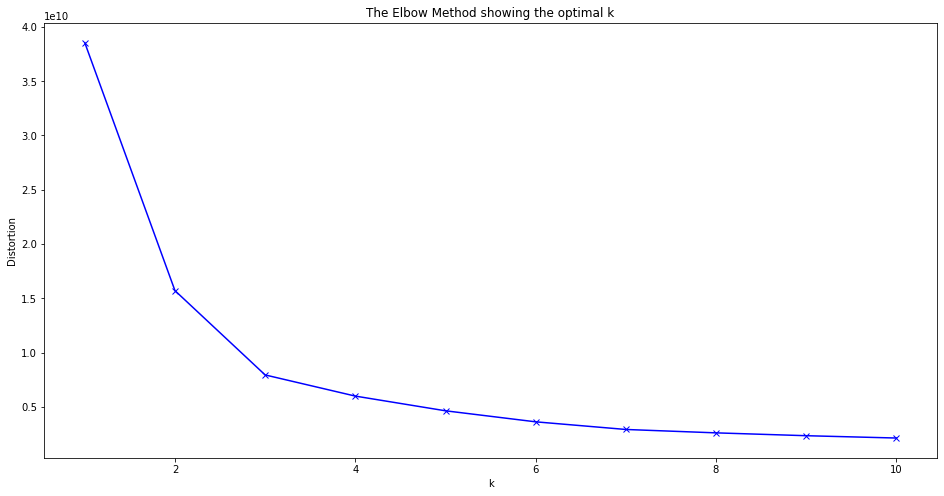

In [37]:
# Determining the optimal number of clusters using elbow method for entire dataset dataframe


wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# wcss = within cluster sum of square
# The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [38]:
# Perform K-Means and add a 'Cluster' column to store the cluster results

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)



merged5['Cluster'] = pd.Series(y_means, index=merged5.index)

In [41]:
merged5.groupby('Cluster').client_id.nunique()

Cluster
0    63379
1    30890
2    51337
3    34368
Name: client_id, dtype: int64

In [40]:
merged5[merged5['registered'] == True].groupby('Cluster').client_id.nunique()

Cluster
0    438
1    224
2    433
3    246
Name: client_id, dtype: int64

In [42]:
merged5[merged5['Opened'] == True].groupby('Cluster').client_id.nunique()

Cluster
0    5428
1    2663
2    5441
3    3970
Name: client_id, dtype: int64

In [17]:
# Creating a final dataframe to store just the details of registered users

final = merged5[merged5['registered'] == True]
final

,client_id,profile_item_name,class_name,class_category,class_title,ZIP_CODE,email_subject_line,age,economic_stability,gender,homeowner_renter_status,home_market_value,income_code,length_of_residence,line_of_business,marital_status,net_worth_indicator,number_of_adults,number_of_children,orphan_status,overall_educ_attain_index,overall_soc_econ_status,overall_soc_econ_status_index,overall_tech_adoption_index,registered,Opened,lottery win and registered?,State
50544,1999120101353661,Affording Essential Expenses,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
50545,1999120101353661,Rainy Day Expense,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
50546,1999120101353661,Budgeting Habits,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
50547,1999120101353661,Net Worth Calculation Habits,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
50548,1999120101353661,Emergency Fund Savings,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32151866,1999120100130567,0,0,0,0,0,"How do you want to look, {{ contact.firstname }}?",51,6.0,1,1,7,5.0,15.0,2,1,7.0,4.0,0.0,2,13.0,3,36.0,14.0,1,0,0,0
32151874,1999120100259457,0,0,0,0,0,"Almost done, {{ contact.firstname }}.",48,11.0,2,1,3,9.0,15.0,4,1,6.0,4.0,0.0,1,10.0,3,32.0,16.0,1,0,0,0
32151881,1999120100259457,0,0,0,0,0,"😄 {{ contact.firstname }}, look what you star...",48,11.0,2,1,3,9.0,15.0,4,1,6.0,4.0,0.0,1,10.0,3,32.0,16.0,1,0,0,0
32151897,1999120100259457,0,0,0,0,0,"Almost done, {{ contact.firstname }}.",48,11.0,2,1,3,9.0,15.0,1,1,6.0,4.0,0.0,1,10.0,3,32.0,16.0,1,0,0,0


In [18]:
# Drop duplicates from final dataframe

final.drop_duplicates()

,client_id,profile_item_name,class_name,class_category,class_title,ZIP_CODE,email_subject_line,age,economic_stability,gender,homeowner_renter_status,home_market_value,income_code,length_of_residence,line_of_business,marital_status,net_worth_indicator,number_of_adults,number_of_children,orphan_status,overall_educ_attain_index,overall_soc_econ_status,overall_soc_econ_status_index,overall_tech_adoption_index,registered,Opened,lottery win and registered?,State
50544,1999120101353661,Affording Essential Expenses,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
50545,1999120101353661,Rainy Day Expense,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
50546,1999120101353661,Budgeting Habits,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
50547,1999120101353661,Net Worth Calculation Habits,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
50548,1999120101353661,Emergency Fund Savings,health-food-journaling,health,Gaining Insight with a Food/Mood Journal,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32151866,1999120100130567,0,0,0,0,0,"How do you want to look, {{ contact.firstname }}?",51,6.0,1,1,7,5.0,15.0,2,1,7.0,4.0,0.0,2,13.0,3,36.0,14.0,1,0,0,0
32151874,1999120100259457,0,0,0,0,0,"Almost done, {{ contact.firstname }}.",48,11.0,2,1,3,9.0,15.0,4,1,6.0,4.0,0.0,1,10.0,3,32.0,16.0,1,0,0,0
32151881,1999120100259457,0,0,0,0,0,"😄 {{ contact.firstname }}, look what you star...",48,11.0,2,1,3,9.0,15.0,4,1,6.0,4.0,0.0,1,10.0,3,32.0,16.0,1,0,0,0
32151897,1999120100259457,0,0,0,0,0,"Almost done, {{ contact.firstname }}.",48,11.0,2,1,3,9.0,15.0,1,1,6.0,4.0,0.0,1,10.0,3,32.0,16.0,1,0,0,0


In [19]:
# Storing features that are required for analysis

x = final.iloc[:, [7,8,9,11,12,15,20,23]].values
print(x.shape)

(1501725, 8)


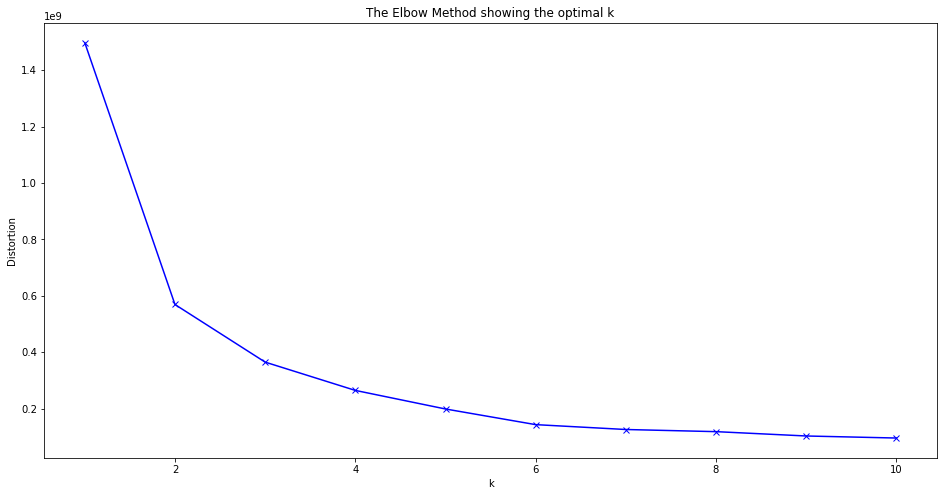

In [20]:
# Determining the optimal number of clusters using elbow method for registered users dataframe


wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# wcss = within cluster sum of square
# The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [21]:
# Perform K-Means and add a 'Cluster' column to store the cluster results

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)



final['Cluster'] = pd.Series(y_means, index=final.index)

<ipython-input-21-be977e173e75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Cluster'] = pd.Series(y_means, index=final.index)


In [22]:
# Print the count of users by cluster

final.groupby('Cluster').client_id.nunique()

Cluster
0    434
1    412
2    242
3    253
Name: client_id, dtype: int64

In [34]:
#Printing top profile item names from cluster  - 0

final[final['Cluster'] == 0].groupby(['profile_item_name']).client_id.nunique().sort_values(ascending =False).head(n=10)

profile_item_name
Comprised Mental Health         233
Physical Activity Level         232
Financial Security Level        231
Current Physical Health         231
Bill Payment Method              57
Emergency Fund Savings           54
Rainy Day Expense                54
Budgeting Habits                 54
Retirement Savings Habits        54
Affording Essential Expenses     54
Name: client_id, dtype: int64

In [35]:
# Store the results of finance class category in final1 dataframe

final1 = final[final['class_category'] == 'finance']
final1.head(n=5)

,client_id,profile_item_name,class_name,class_category,class_title,ZIP_CODE,email_subject_line,age,economic_stability,gender,homeowner_renter_status,home_market_value,income_code,length_of_residence,line_of_business,marital_status,net_worth_indicator,number_of_adults,number_of_children,orphan_status,overall_educ_attain_index,overall_soc_econ_status,overall_soc_econ_status_index,overall_tech_adoption_index,registered,Opened,lottery win and registered?,State,Cluster
50700,1999120101353661,Affording Essential Expenses,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
50701,1999120101353661,Rainy Day Expense,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
50702,1999120101353661,Budgeting Habits,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
50703,1999120101353661,Net Worth Calculation Habits,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
50704,1999120101353661,Emergency Fund Savings,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1


In [26]:
# Drop the duplicates from final1 dataframe

final1.drop_duplicates()

,client_id,profile_item_name,class_name,class_category,class_title,ZIP_CODE,email_subject_line,age,economic_stability,gender,homeowner_renter_status,home_market_value,income_code,length_of_residence,line_of_business,marital_status,net_worth_indicator,number_of_adults,number_of_children,orphan_status,overall_educ_attain_index,overall_soc_econ_status,overall_soc_econ_status_index,overall_tech_adoption_index,registered,Opened,lottery win and registered?,State,Cluster
50700,1999120101353661,Affording Essential Expenses,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
50701,1999120101353661,Rainy Day Expense,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
50702,1999120101353661,Budgeting Habits,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
50703,1999120101353661,Net Worth Calculation Habits,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
50704,1999120101353661,Emergency Fund Savings,finance-side-hustles,finance,Need More Money? Get Your Side Hustle On,0,"😄 {{ contact.firstname }}, look what you started.",44,16.0,2,1,4,4.0,11.0,2,2,4.0,1.0,0.0,2,23.0,2,36.0,19.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30206806,1999120100030025,Work-Life Balance,finance-rainy-day,finance,Starting a Rainy Day Fund to Cover the Unexpected,15131,"⭐ Welcome to {{ contact.application_name }}, {...",50,11.0,1,1,3,3.0,15.0,3,2,5.0,1.0,0.0,1,66.0,3,50.0,51.0,1,0,0,8,0
30206807,1999120100030025,Recent Life Events,finance-rainy-day,finance,Starting a Rainy Day Fund to Cover the Unexpected,15131,"⭐ Welcome to {{ contact.application_name }}, {...",50,11.0,1,1,3,3.0,15.0,3,2,5.0,1.0,0.0,1,66.0,3,50.0,51.0,1,0,0,8,0
30206808,1999120100030025,Mis-Wanting,finance-rainy-day,finance,Starting a Rainy Day Fund to Cover the Unexpected,15131,"⭐ Welcome to {{ contact.application_name }}, {...",50,11.0,1,1,3,3.0,15.0,3,2,5.0,1.0,0.0,1,66.0,3,50.0,51.0,1,0,0,8,0
30206809,1999120100030025,Risk Tolerance,finance-rainy-day,finance,Starting a Rainy Day Fund to Cover the Unexpected,15131,"⭐ Welcome to {{ contact.application_name }}, {...",50,11.0,1,1,3,3.0,15.0,3,2,5.0,1.0,0.0,1,66.0,3,50.0,51.0,1,0,0,8,0


In [28]:
# # Storing features that are required for analysis on finance dataframe

x = final1.iloc[:, [7,8,9,11,12,15,20,23]].values
print(x.shape)

(703376, 8)


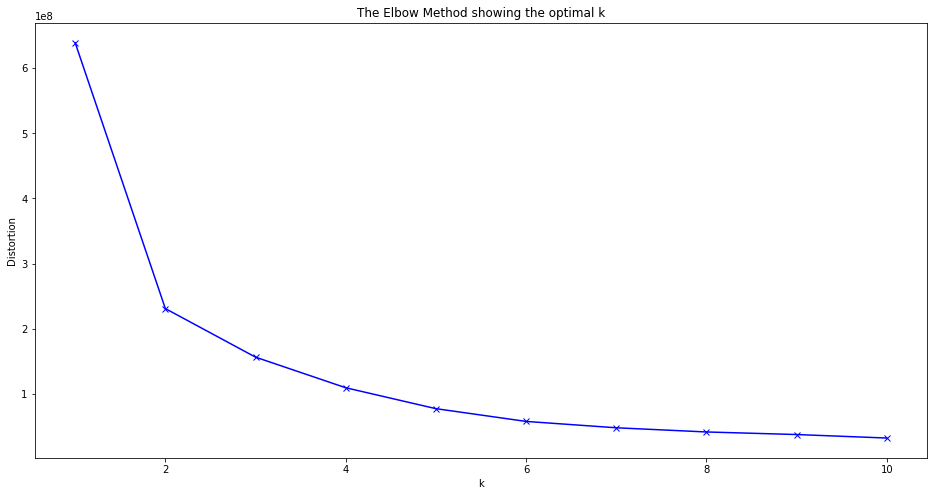

In [29]:
# Determining the optimal number of clusters using elbow method for registered users from finance category

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#wcss = within cluster sum of square
# The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [30]:
# Performing K-Means Clustering and storing the results in Cluster column

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)



final1['Cluster'] = pd.Series(y_means, index=final1.index)

<ipython-input-30-ba80c5f814b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Cluster'] = pd.Series(y_means, index=final1.index)


In [31]:
# Print the count of users by cluster

final1.groupby('Cluster').client_id.nunique()

Cluster
0    72
1    55
2    48
3    40
Name: client_id, dtype: int64